## Import Modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

train_path = './train/train.csv'
df = pd.read_csv(train_path)
# df = pd.read_csv("./train/train.csv", skiprows = lambda x: x>0 and np.random.rand() > 0.1)
df_test = pd.read_csv('./test/test.csv')


# Overall Properties

### basic Information

* All original features except "hour" are categorical.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


### Differences between The Training and Test Set

* Some discrepancies

In [3]:
print('The number of discrepancies between Train and Test sets:')
for a in df.columns.to_list()[3:]:
    s1 = set(df[a])
    s2 =  set(df_test[a])
    print('\"' + a + '\"\t\t',  len(s2.difference(s1)))

The number of discrepancies between Train and Test sets:
"C1"		 0
"banner_pos"		 0
"site_id"		 105
"site_domain"		 167
"site_category"		 0
"app_id"		 584
"app_domain"		 21
"app_category"		 0
"device_id"		 209565
"device_ip"		 609169
"device_model"		 52
"device_type"		 0
"device_conn_type"		 0
"C14"		 259
"C15"		 0
"C16"		 0
"C17"		 39
"C18"		 0
"C19"		 1
"C20"		 0
"C21"		 2


### Timestamp
* "hour" has the format '%y%m%d%H' and can be sliced to weekday and hour 


In [4]:
df.head()

df['hour'] = pd.to_datetime(df['hour'], format= '%y%m%d%H', errors='ignore')
df['weekday'] = df['hour'].dt.weekday
df['hr_24'] = df['hour'].dt.hour

df = df.drop(['hour'], axis=1)

### duplication and number of distinct values

* the Number of distinct values in each column

In [5]:
df.nunique()

id                  40428967
click                      2
C1                         7
banner_pos                 7
site_id                 4737
site_domain             7745
site_category             26
app_id                  8552
app_domain               559
app_category              36
device_id            2686408
device_ip            6729486
device_model            8251
device_type                5
device_conn_type           4
C14                     2626
C15                        8
C16                        9
C17                      435
C18                        4
C19                       68
C20                      172
C21                       60
weekday                    7
hr_24                     24
dtype: int64

* No duplicated ID: ID is useless in model training.

In [6]:
print('The Number of duplicated ID is: ', df['id'].duplicated().sum())

The Number of duplicated ID is:  0


In [7]:
df.isna().sum()
# No null values.

id                  0
click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
weekday             0
hr_24               0
dtype: int64

### C15 and C16 are too similar

In [8]:
df.C15.value_counts().sort_values()

768         1621
480         2137
1024        2560
120         3069
728        74533
216       298794
300      2337294
320     37708959
Name: C15, dtype: int64

In [9]:
df.C16.value_counts().sort_values()
# One of the two variables can be discarded.

1024        1621
320         2137
768         2560
20          3069
90         74533
480       103365
36        298794
250      1806334
50      38136554
Name: C16, dtype: int64

### One device_id is dominant

In [10]:
df.device_id.value_counts()
# Device_id a99f214a is dominant. This feature can be binarized as a99f214a/non-a99f214a

a99f214a    33358308
0f7c61dc       21356
c357dbff       19667
936e92fb       13712
afeffc18        9654
              ...   
f1160502           1
8470040e           1
054c24e8           1
35fb9c7b           1
2e7d4e84           1
Name: device_id, Length: 2686408, dtype: int64

### Counts and CTR in Each Column

* Overall Clicks

count    4.042897e+07
mean     1.698056e-01
std      3.754620e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: click, dtype: float64


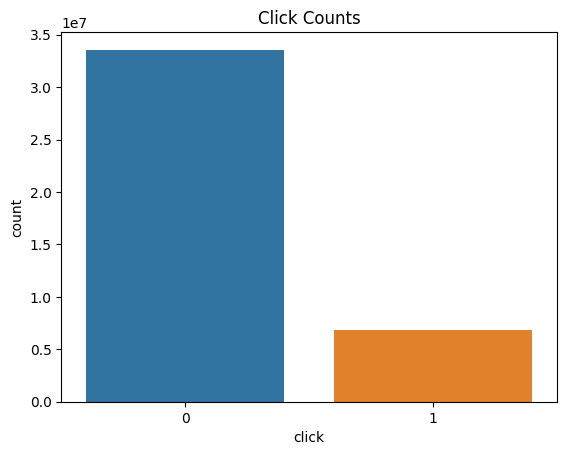

In [11]:
# sns.set()

print(df.click.describe())
sns.countplot(x=df['click']).set(title='Click Counts')
plt.show()

* Counts of Elements in Each Column

1)  Again, C16 and C15 are almost identical.

2)  The total clicks has some kind of distribution in each figure, but still need to see the click-through rate.

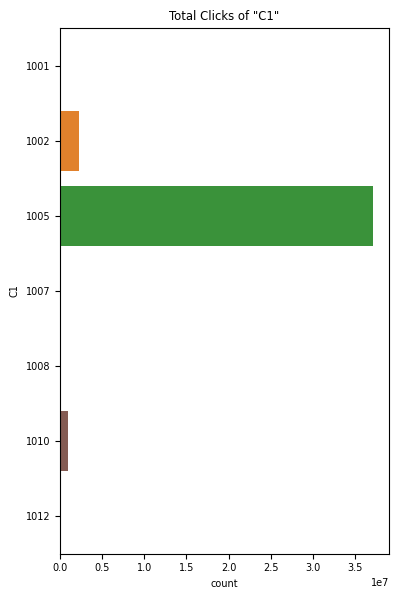

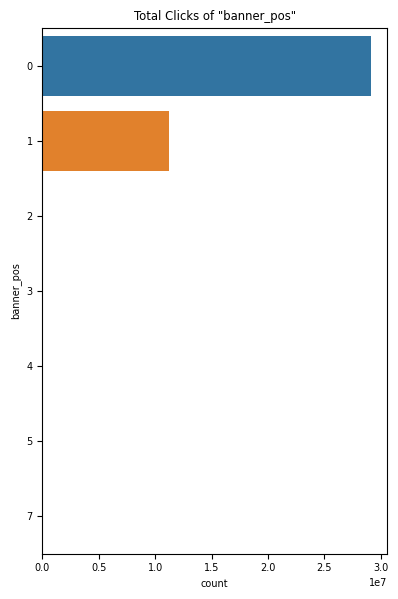

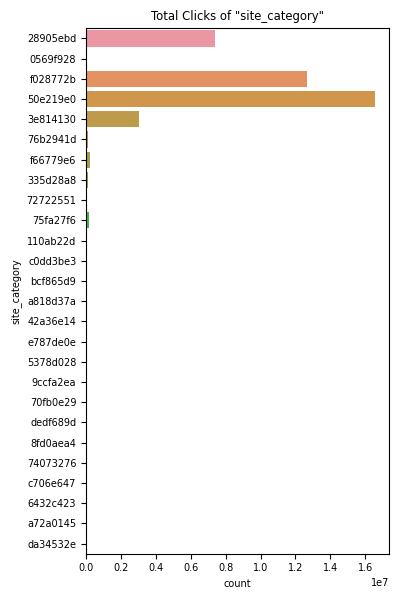

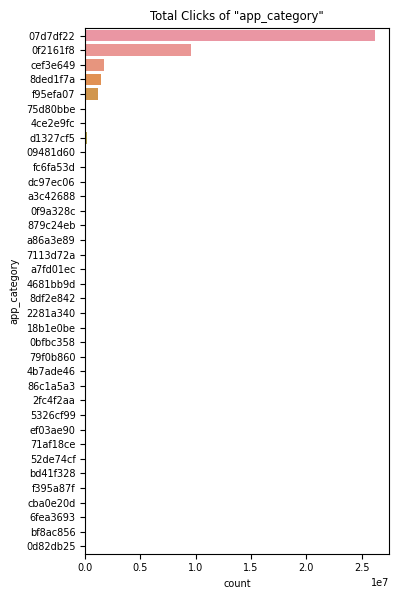

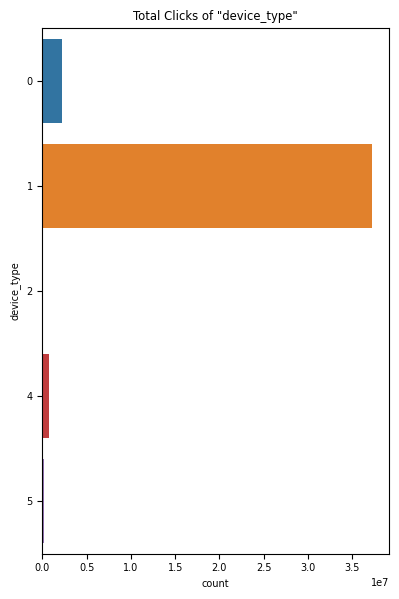

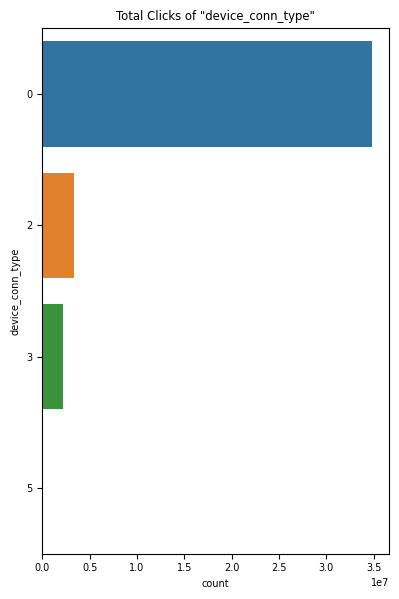

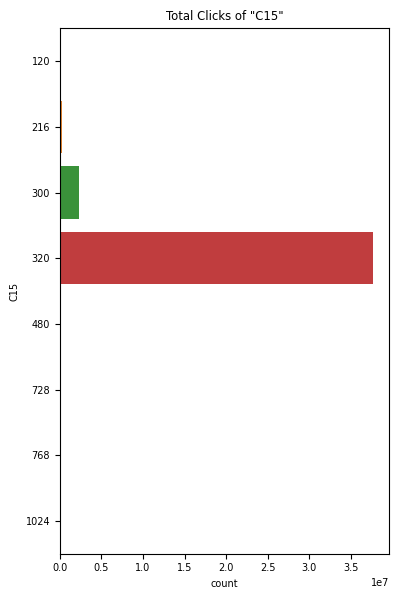

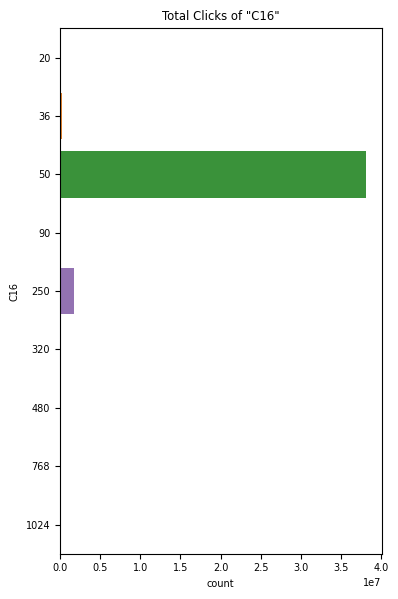

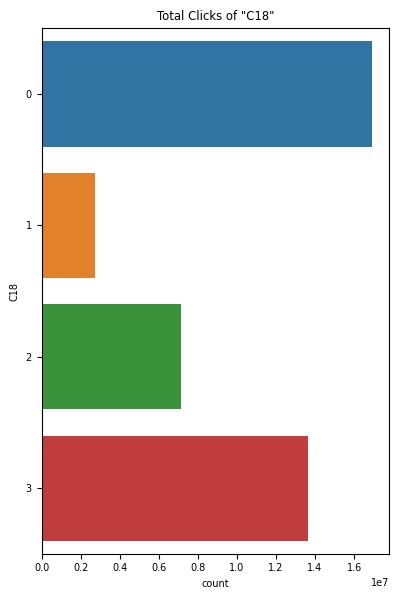

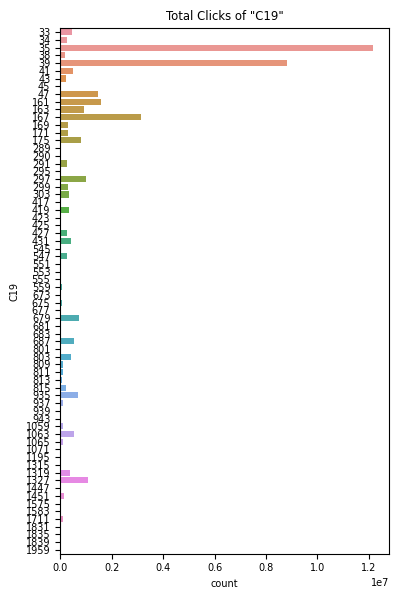

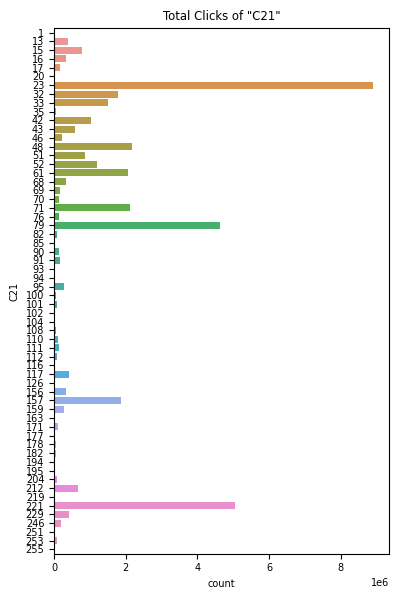

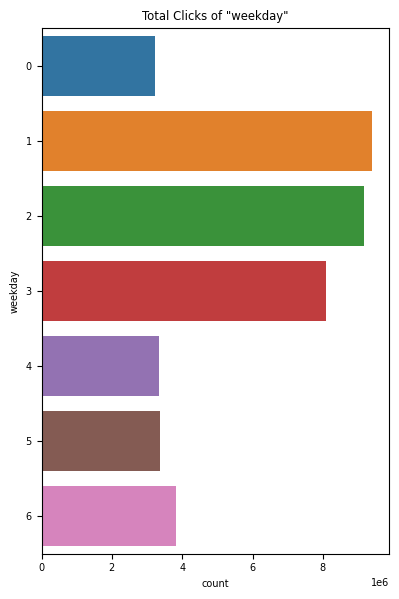

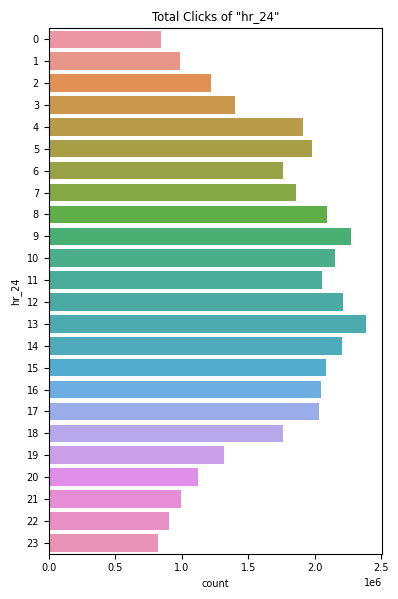

In [12]:
name_list = df.columns.to_list()

name_list = [ 'C1',
 'banner_pos',
'site_category',
 'app_category',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C18',
 'C19',
 'C21',
 'weekday',
 'hr_24']


for a in name_list:
    plt.figure(figsize=(4,6))
    plt.rcParams["font.size"] =7
    sns.countplot(y=df[a]).set(title='Total Clicks of' + ' \"' + a +'\"')
    plt.tight_layout()
    plt.show()

* CTR of Elements in Each Column

1) Unfortunately, the click-through Rate distribution are quite flat in some certain feature. Especially in 'weekday' and 'hr_24'.
2) This also implies that 'weekday' and 'hr_24' will not have heavy impact on model training.
3) Again, C15 and C16 are very similar.

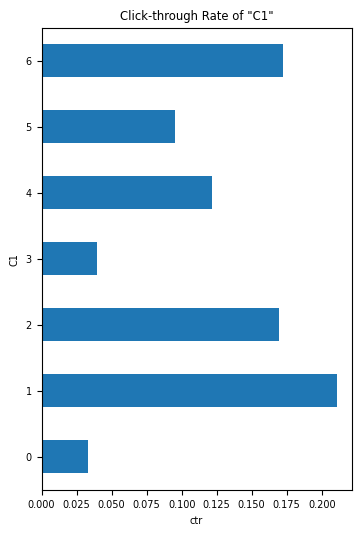

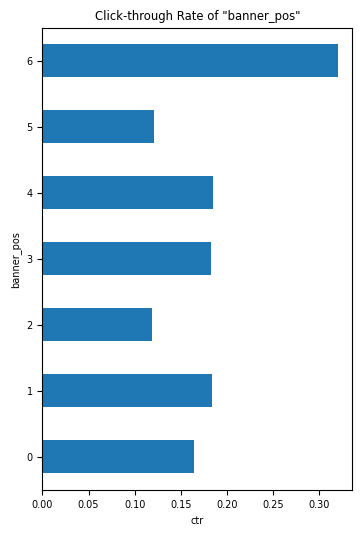

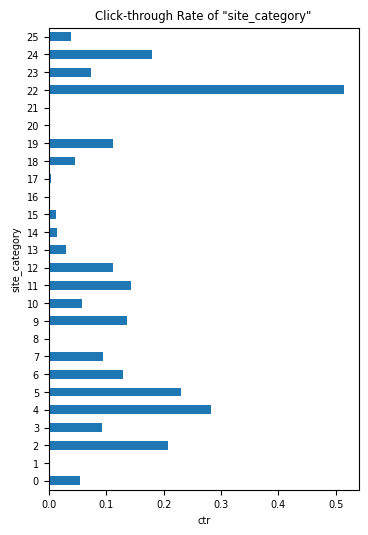

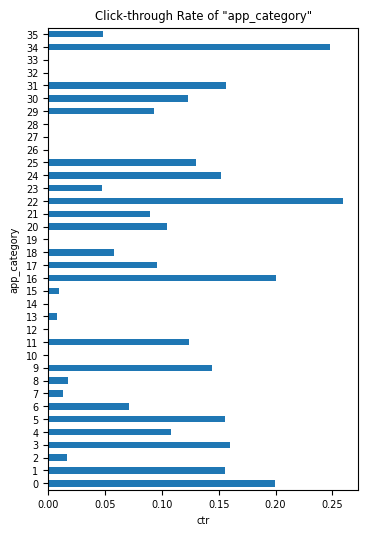

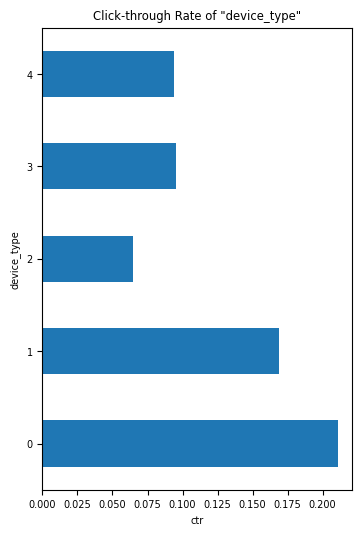

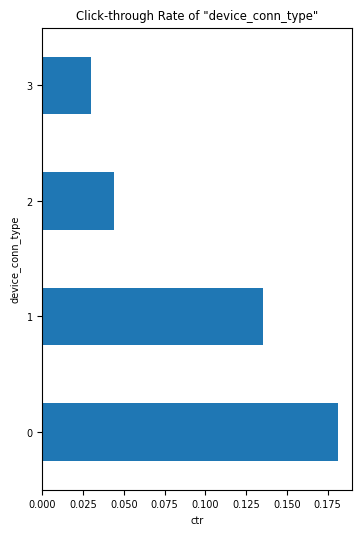

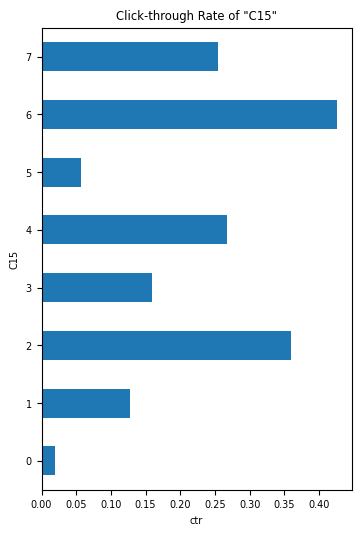

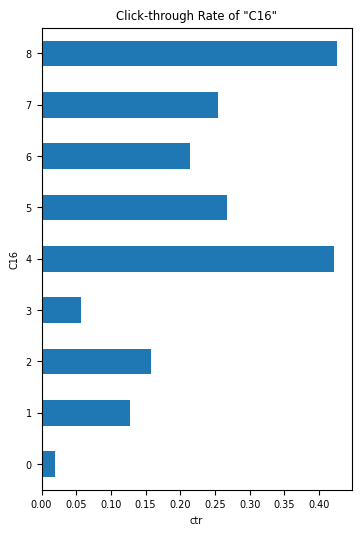

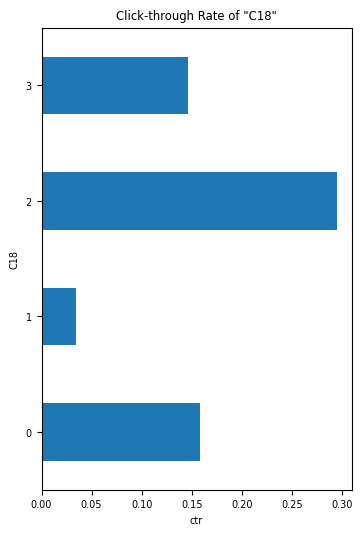

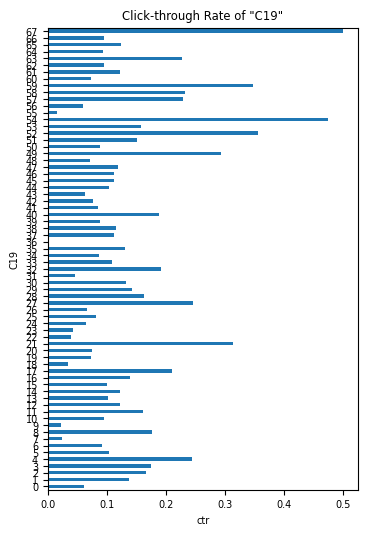

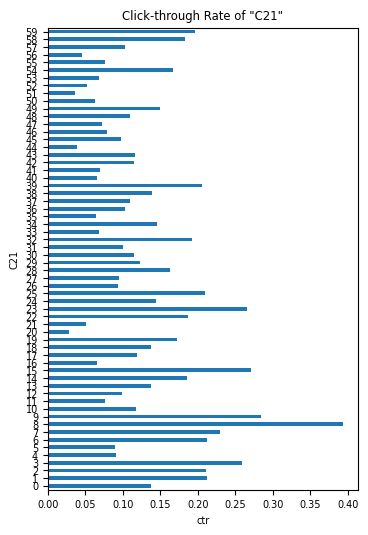

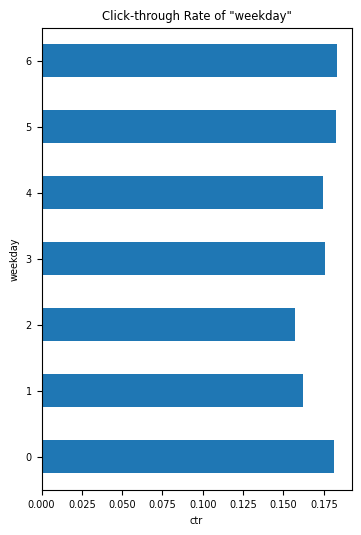

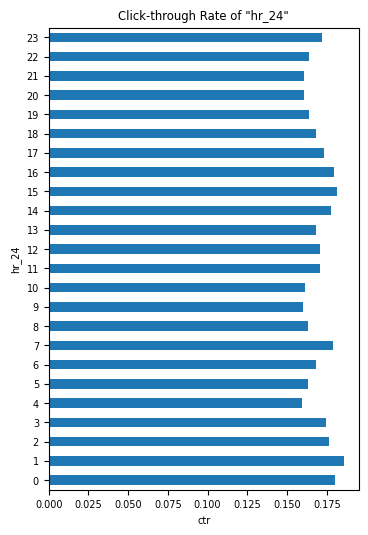

In [13]:
for a in name_list:

    tmp_size = df.groupby(a).size().reset_index(name = 'tmp_size')
    tmp_clicked = df.groupby(a)['click'].sum().reset_index(name= 'tmp_clicked')
    tmp_size['ctr'] = tmp_clicked['tmp_clicked']/tmp_size['tmp_size']

    plt.figure(figsize=(4,6))
    plt.rcParams["font.size"] =7

    tmp_size['ctr'].plot.barh()

    plt.title('Click-through Rate of' + ' \"' + a +'\"')
    plt.ylabel(a)
    plt.xlabel('ctr')
    plt.show()

### Histogram of Click Rate

1) The click-through Rate falls in the area between 0.2 to 0.4 in most figures.
2) One can see some distributions are very concentrated. The fact implies these features will have large impact on model training

In [14]:
cols =['site_id',
'site_domain',
'app_id',
'app_domain',
'device_id',
'device_ip',
'device_model',
'C14',
'C17',
'C19',
'C20',
'C21',]

In [15]:
plt.rcParams["font.size"] = 12

for a in cols:

    new_attr = 'ctr_' + a
    
    tmp_size = df.groupby(a).size().reset_index(name = 'tmp_size')
    tmp_clicked = df.groupby(a)['click'].sum().reset_index(name= 'tmp_clicked')
    tmp_size[new_attr] = tmp_clicked['tmp_clicked']/tmp_size['tmp_size']
    tmp_size = tmp_size.drop(['tmp_size'], axis=1)

    df = pd.merge(df, tmp_size, on = a, how= 'left')
# data preparation

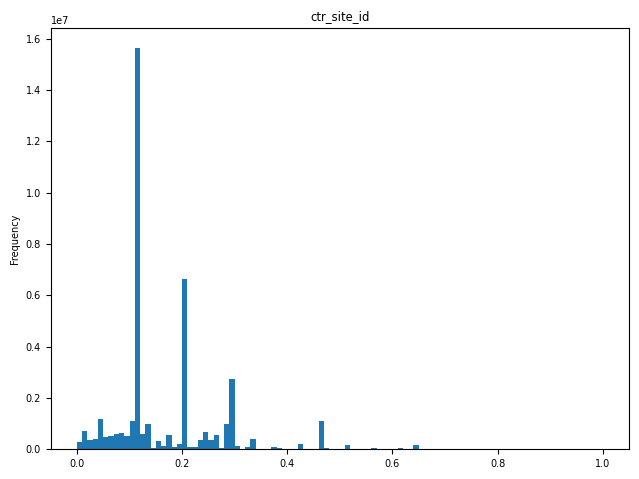

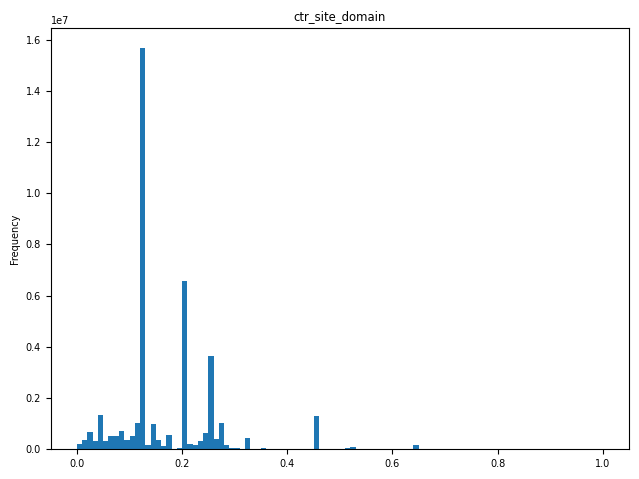

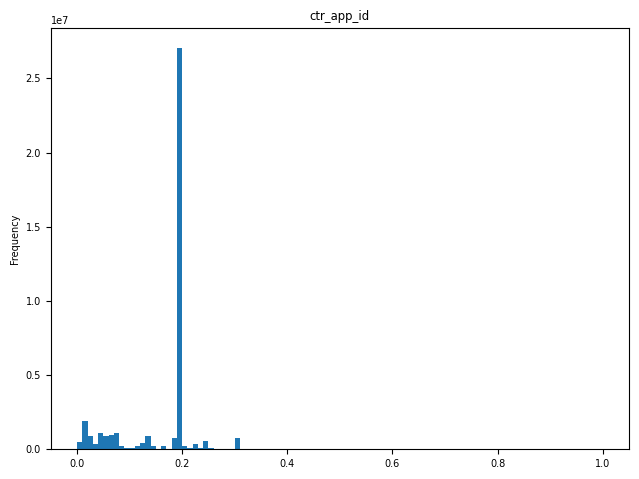

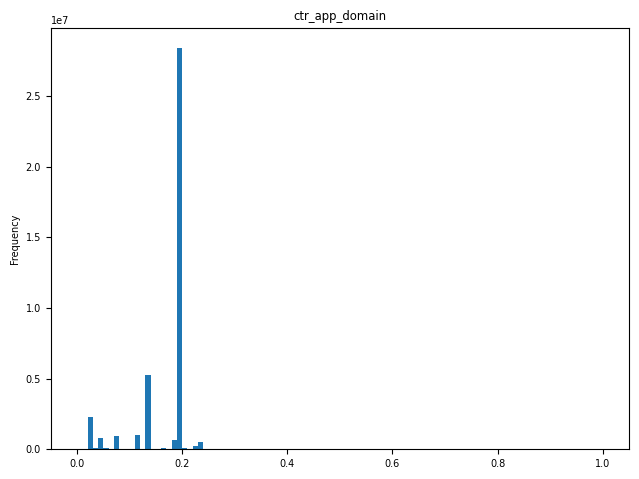

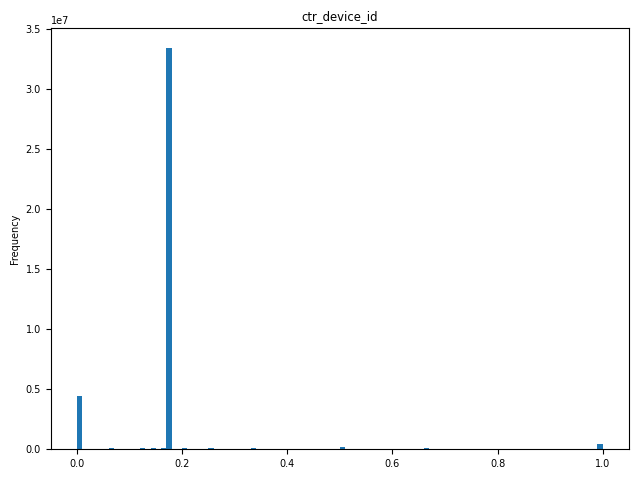

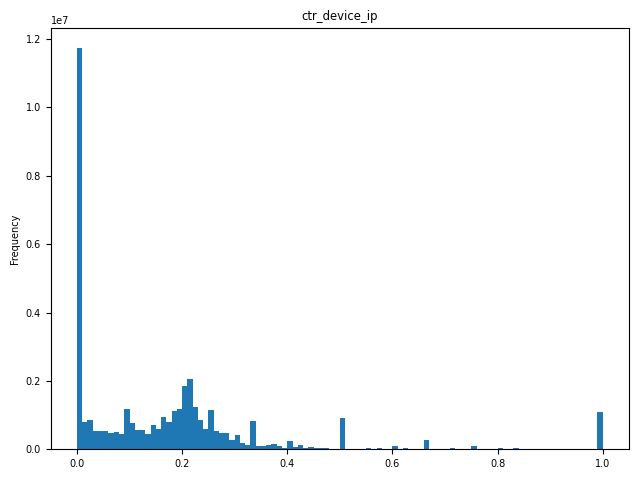

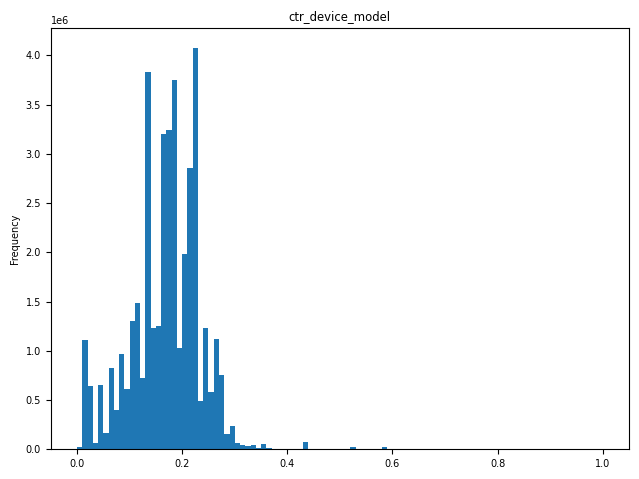

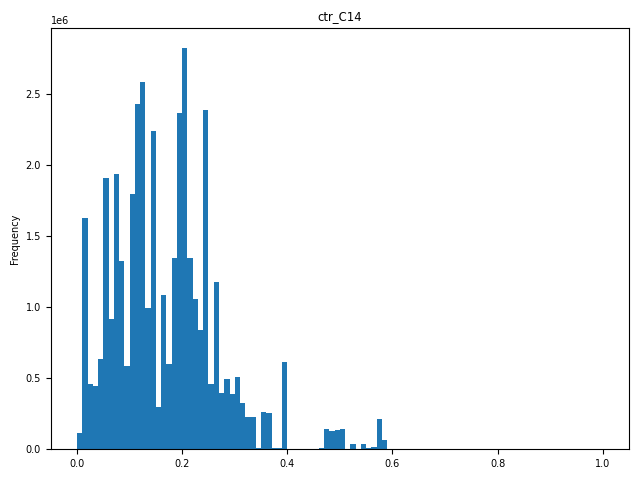

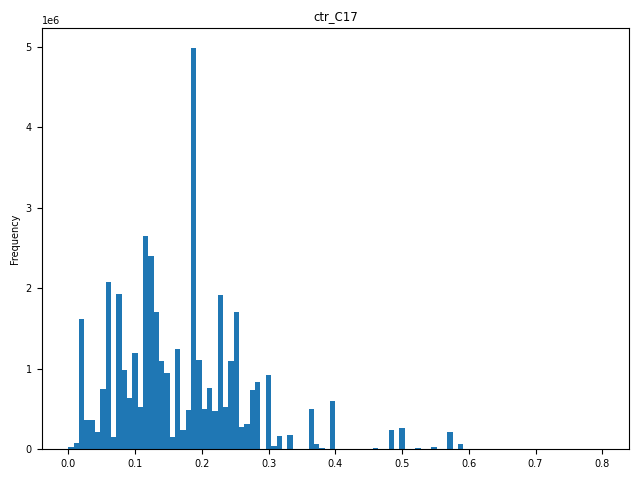

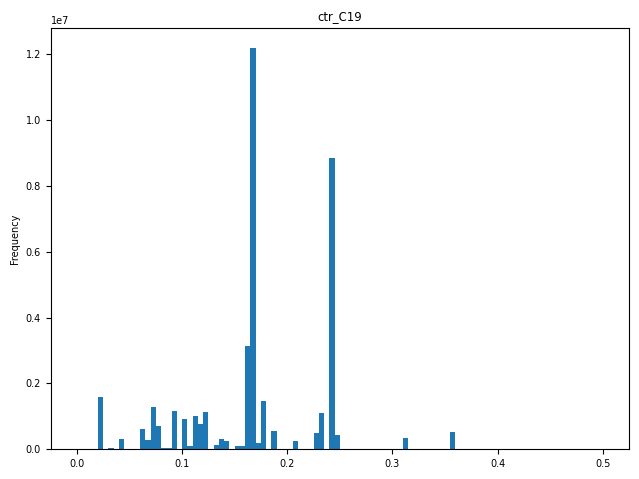

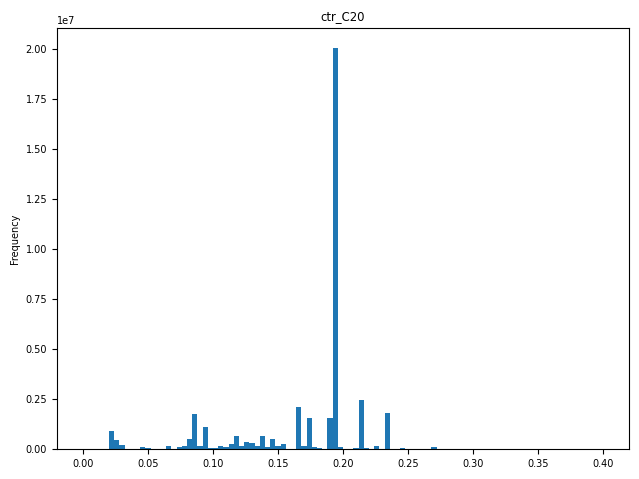

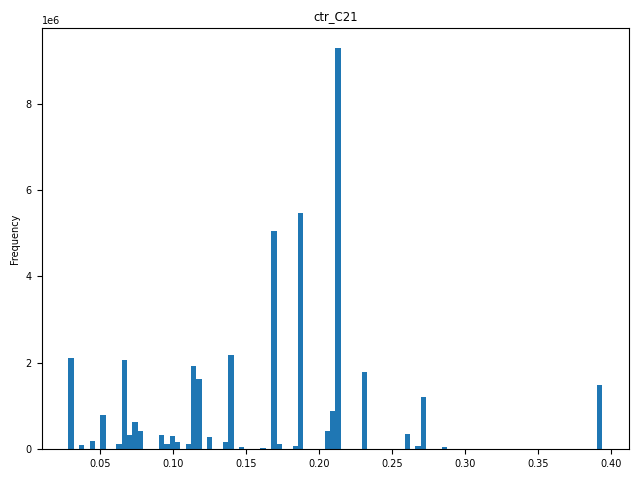

In [16]:
plt.rcParams["font.size"] =7

for a in cols:
    new_attr = 'ctr_' + a

    df[new_attr].plot.hist(bins=100, title=new_attr)
    plt.tight_layout()
    plt.show()


## The Scale of feature

* Visiting frequency represents the scale of a site or app or the popularity of device_model.
  The more popular the site (or app), the more likely would a user click the link.

* For each figure, one may find a turing frequency to indicate when the distribution tail goes flat. For example, 60 may be a good choice for 'site_domain' case

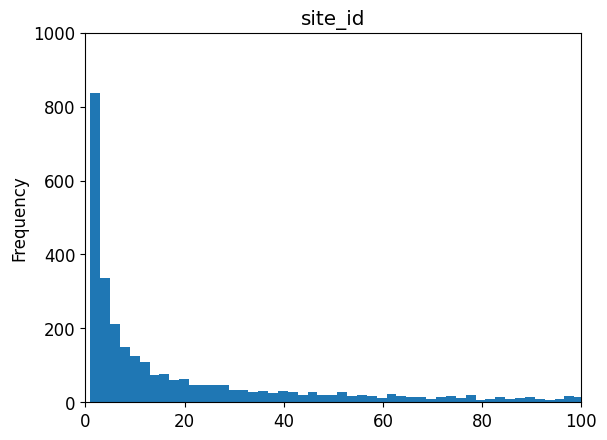

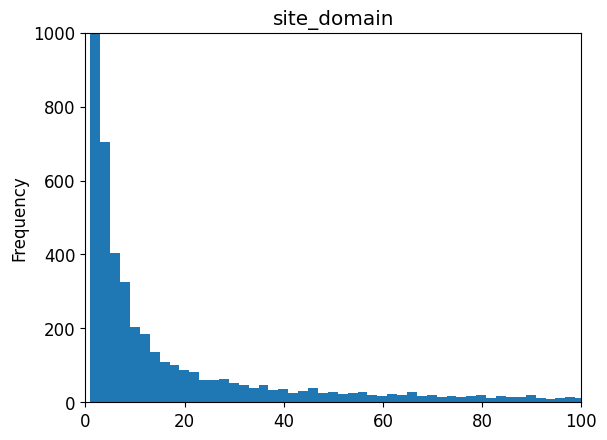

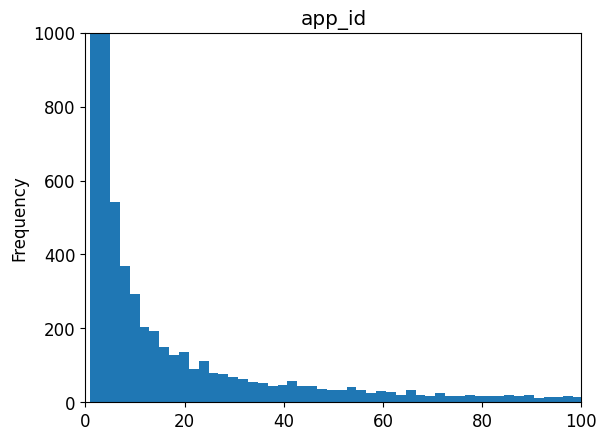

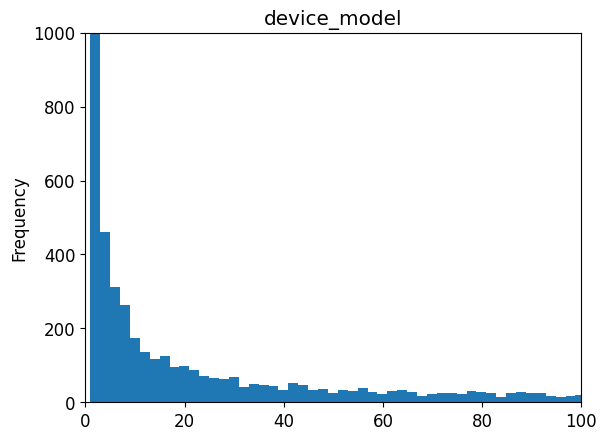

In [17]:
name_list = ['site_id', 'site_domain', 'app_id', 'device_model']

plt.rcParams["font.size"] = 12

for name in name_list:
    tmp = df[name].value_counts()
    tmp=tmp[tmp<2000]
    tmp.plot.hist(bins=1000, xlim=[0,100], ylim=[0, 1000], title=name)
    plt.show()

